In [1]:
import pandas as pd
import re    
import nltk   
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

train=pd.read_csv('/home/dell/PROJECTS/train.csv')

In [2]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


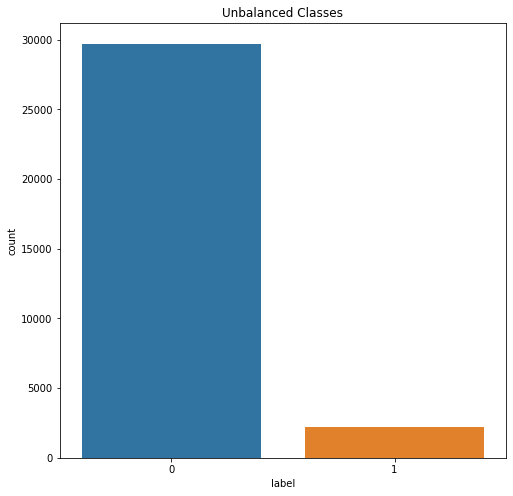

In [3]:
plt.figure(figsize=(8, 8))
sns.countplot('label',data=train)
plt.title('Unbalanced Classes')
plt.show()

In [4]:
from sklearn.utils import resample

In [5]:
nonracist=train[train['label'] == 0]

In [6]:
nonracist

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
racist=train[train['label'] == 1]

In [8]:
nonracist_downsampled = resample(nonracist,replace = False,n_samples = len(racist), random_state = 27)

In [9]:
downsampled = pd.concat([nonracist_downsampled, racist])

In [10]:
downsampled

,id,label,tweet
20250,20251,0,#saysomething bull up: you will dominate you...
11209,11210,0,the latest el runa uturunco diario! thanks to...
28607,28608,0,i am thankful for warm clothing. #thankful #po...
8984,8985,0,@user helping little people manage big #emoti...
5890,5891,0,#whatilearnedtoday frog safe australia has bet...
27795,27796,0,mana andharilo unna common qualification ! man...
13650,13651,0,@user to be pa of a green community #getconn...
17545,17546,0,@user #theturnup to my lovely bf's bih day ...
23234,23235,0,every celebration has a reason.ð independ...
14808,14809,0,phil kessel is so happy he won the stanley c...


In [11]:
downsampled["label"].value_counts()

1    2242
0    2242
Name: label, dtype: int64

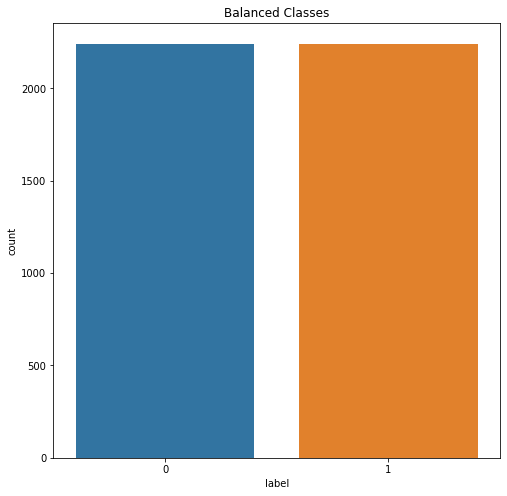

In [12]:
plt.figure(figsize=(8, 8))
sns.countplot('label',data=downsampled)
plt.title('Balanced Classes')
plt.show()

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [14]:
test=pd.read_csv('/home/dell/PROJECTS/test.csv')

In [15]:
test.size

34394

In [16]:
combi = downsampled.append(test, ignore_index=True)

/home/dell/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [17]:
combi

,id,label,tweet
0,20251,0.0,#saysomething bull up: you will dominate you...
1,11210,0.0,the latest el runa uturunco diario! thanks to...
2,28608,0.0,i am thankful for warm clothing. #thankful #po...
3,8985,0.0,@user helping little people manage big #emoti...
4,5891,0.0,#whatilearnedtoday frog safe australia has bet...
5,27796,0.0,mana andharilo unna common qualification ! man...
6,13651,0.0,@user to be pa of a green community #getconn...
7,17546,0.0,@user #theturnup to my lovely bf's bih day ...
8,23235,0.0,every celebration has a reason.ð independ...
9,14809,0.0,phil kessel is so happy he won the stanley c...


In [18]:
#will pick any word starting with ‘@’
import numpy as np
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,20251,0.0,#saysomething bull up: you will dominate you...,#saysomething bull up: you will dominate you...
1,11210,0.0,the latest el runa uturunco diario! thanks to...,the latest el runa uturunco diario! thanks to...
2,28608,0.0,i am thankful for warm clothing. #thankful #po...,i am thankful for warm clothing. #thankful #po...
3,8985,0.0,@user helping little people manage big #emoti...,helping little people manage big #emotions ...
4,5891,0.0,#whatilearnedtoday frog safe australia has bet...,#whatilearnedtoday frog safe australia has bet...


In [19]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head()

,id,label,tweet,tidy_tweet
0,20251,0.0,#saysomething bull up: you will dominate you...,#saysomething bull up you will dominate you...
1,11210,0.0,the latest el runa uturunco diario! thanks to...,the latest el runa uturunco diario thanks to...
2,28608,0.0,i am thankful for warm clothing. #thankful #po...,i am thankful for warm clothing #thankful #po...
3,8985,0.0,@user helping little people manage big #emoti...,helping little people manage big #emotions ...
4,5891,0.0,#whatilearnedtoday frog safe australia has bet...,#whatilearnedtoday frog safe australia has bet...


In [20]:
pd.set_option("display.max_colwidth", 200) 

In [21]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,20251,0.0,#saysomething bull up: you will dominate your bull and you will direct it whatever you want it to do. when,#saysomething bull will dominate your bull will direct whatever want when
1,11210,0.0,the latest el runa uturunco diario! thanks to @user @user @user #fotografia,latest runa uturunco diario thanks #fotografia
2,28608,0.0,i am thankful for warm clothing. #thankful #positive,thankful warm clothing #thankful #positive
3,8985,0.0,@user helping little people manage big #emotions #feelings #disappointment,helping little people manage #emotions #feelings #disappointment
4,5891,0.0,#whatilearnedtoday frog safe australia has better service than the us va. @user @user,#whatilearnedtoday frog safe australia better service than


In [22]:
# nltk’s PorterStemmer() function to normalize the tweets.But before that we will have to tokenize the tweets
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#saysomething, bull, will, dominate, your, bull, will, direct, whatever, want, when]
1                                    [latest, runa, uturunco, diario, thanks, #fotografia]
2                                         [thankful, warm, clothing, #thankful, #positive]
3                 [helping, little, people, manage, #emotions, #feelings, #disappointment]
4                       [#whatilearnedtoday, frog, safe, australia, better, service, than]
Name: tidy_tweet, dtype: object

In [23]:
#now we can normalize
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#saysometh, bull, will, domin, your, bull, will, direct, whatev, want, when]
1                             [latest, runa, uturunco, diario, thank, #fotografia]
2                                             [thank, warm, cloth, #thank, #posit]
3                           [help, littl, peopl, manag, #emot, #feel, #disappoint]
4                [#whatilearnedtoday, frog, safe, australia, better, servic, than]
Name: tidy_tweet, dtype: object

In [24]:
#Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi.head()

,id,label,tweet,tidy_tweet
0,20251,0.0,#saysomething bull up: you will dominate your bull and you will direct it whatever you want it to do. when,#saysometh bull will domin your bull will direct whatev want when
1,11210,0.0,the latest el runa uturunco diario! thanks to @user @user @user #fotografia,latest runa uturunco diario thank #fotografia
2,28608,0.0,i am thankful for warm clothing. #thankful #positive,thank warm cloth #thank #posit
3,8985,0.0,@user helping little people manage big #emotions #feelings #disappointment,help littl peopl manag #emot #feel #disappoint
4,5891,0.0,#whatilearnedtoday frog safe australia has better service than the us va. @user @user,#whatilearnedtoday frog safe australia better servic than


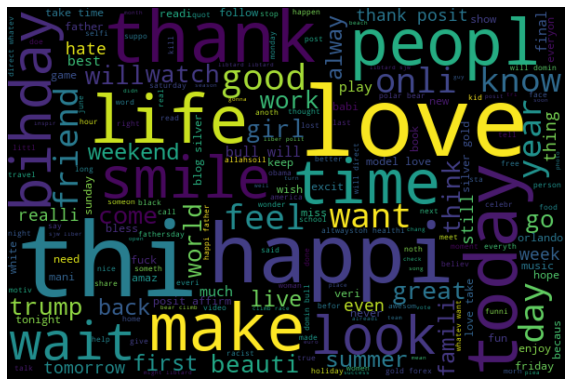

In [25]:
#visualize all the words [combi['label']==0]]
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=400, random_state=21, max_font_size=110).generate(all_words)#800500
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

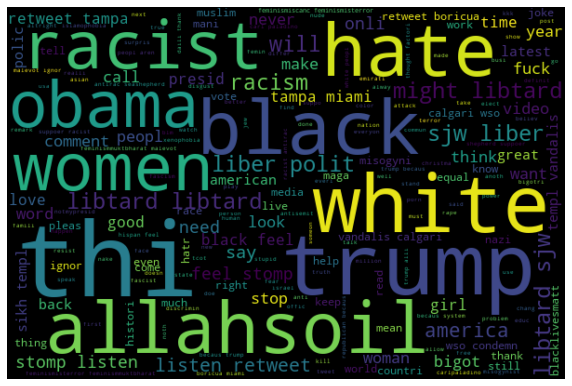

In [26]:
#racist tweets
all_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=400, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


In [28]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
print(HT_regular)

['saysometh', 'fotografia', 'thank', 'posit', 'emot', 'feel', 'disappoint', 'whatilearnedtoday', 'getconnect', 'theturnup', 'thank', 'posit', 'whatimlisteningto', 'music', 'unsign', 'posit', 'bless', 'prayfororlando', 'puls', 'coyoacan', 'mexico', 'mexico', 'mexicoc', 'likeforlik', 'instagood', 'friend', 'memori', 'renaiss', 'music', 'stylistic', 'music', 'histori', 'ancient', 'vitorr', 'staup', 'read', 'share', 'pragu', 'czech', 'europ', 'travel', 'view', 'like', 'beauti', 'murd', 'terribleday', 'lover', 'friend', 'astrolog', 'love', 'home', 'school', 'counsel', 'posit', 'affirm', 'tooexpens', 'notwohit', 'lapatripedialondon', 'lapatripediatravel', 'london', 'proud', 'filibust', 'love', 'life', 'hairstyl', 'tiger', 'funni', 'horribl', 'closecamp', 'rahulgandhi', 'udtapunjab', 'purposetourfargo', 'colonygril', 'xboxon', 'trial', 'rdr', 'rockstargam', 'ournewbridg', 'fridayfeel', 'relax', 'bristol', 'emanuelam', 'stillgriev', 'roadtrip', 'weekend', 'fun', 'calilif', 'calilov', 'momentum

In [29]:
print(HT_negative)

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin', 'neverump', 'xenophobia', 'love', 'peac', 'race', 'ident', 'med', 'altright', 'whitesupremaci', 'linguist', 'race', 'power', 'raciolinguist', 'brexit', 'peopl', 'trump', 'republican', 'michelleobama', 'knick', 'golf', 'jewishsupremacist', 'libtard', 'sjw', 'liber', 'polit', 'trash', 'hate', 'stereotyp', 'prejudic', 'hope', 'hate', 'conflict', 'pol', 'bluelivesmatt', 'draintheswamp', 'ferguson', 'antisemit', 'hocoschool', 'columbiamd', 'hocomd', 'nazi', 'hatr', 'bigotri', 'libtard', 'sjw', 'liber', 'polit', 'fyi', 'tcot', 'topoli', 'blacklivesmatt', 'ushistori', 'eugen', 'biher', 'bigotri', 'altright', 'potu', 'theresist', 'crime', 'offic', 'black', 'retweet', 'tampa', 'miami', 'allahsoil', 'prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip', 'bigot', 'blacklivesmatt', 'feminismiscanc', 'feminismisterror', 'feminismmuktbharat', 'malevot', 'prowar', 'anti', 'islam',

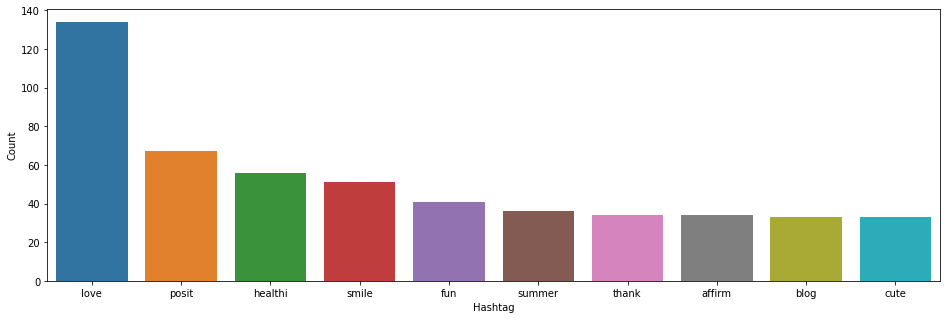

     Hashtag  Count
42      love    134
3      posit     67
229  healthi     56
134    smile     51
76       fun     41
99    summer     36
2      thank     34
46    affirm     34
83      blog     33
143     cute     33


In [30]:
#Non-Racist Tweets
a = nltk.FreqDist(HT_regular)
#print(a)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
#ax.set(ylabel = 'Count')
plt.show()
print(d)

In [31]:
a.most_common(50)

[('love', 134),
 ('posit', 67),
 ('healthi', 56),
 ('smile', 51),
 ('fun', 41),
 ('summer', 36),
 ('thank', 34),
 ('affirm', 34),
 ('blog', 33),
 ('cute', 33),
 ('altwaystoh', 31),
 ('fathersday', 31),
 ('beauti', 30),
 ('gold', 28),
 ('silver', 27),
 ('forex', 26),
 ('music', 25),
 ('friend', 24),
 ('famili', 24),
 ('bless', 23),
 ('model', 23),
 ('girl', 23),
 ('life', 22),
 ('sun', 22),
 ('friday', 21),
 ('father', 21),
 ('quot', 21),
 ('heal', 20),
 ('happi', 20),
 ('selfi', 19),
 ('bihday', 19),
 ('day', 19),
 ('weekend', 17),
 ('motiv', 17),
 ('beach', 17),
 ('wed', 17),
 ('orlando', 16),
 ('inspir', 15),
 ('travel', 14),
 ('fashion', 14),
 ('cool', 14),
 ('peac', 14),
 ('instagood', 13),
 ('work', 13),
 ('grate', 13),
 ('dog', 13),
 ('home', 12),
 ('joy', 12),
 ('london', 11),
 ('funni', 11)]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [33]:
#bag of words feature extraction
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [34]:
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape
#print(bow_vectorizer.vocabulary_)

(21681, 1000)

In [35]:
a=bow.toarray()

In [36]:
bow_vectorizer.get_feature_names()

['abl',
 'absolut',
 'abus',
 'accept',
 'account',
 'act',
 'action',
 'activ',
 'actor',
 'actual',
 'adapt',
 'adventur',
 'advic',
 'affirm',
 'african',
 'afternoon',
 'agre',
 'ahead',
 'aicl',
 'aist',
 'album',
 'aliv',
 'allahsoil',
 'allow',
 'alon',
 'alreadi',
 'altright',
 'altwaystoh',
 'alway',
 'amaz',
 'america',
 'american',
 'angel',
 'angri',
 'anim',
 'anniversari',
 'announc',
 'anoth',
 'anti',
 'antirac',
 'anxieti',
 'anymor',
 'anyon',
 'anyth',
 'appreci',
 'aren',
 'arriv',
 'ask',
 'attack',
 'avail',
 'award',
 'away',
 'awesom',
 'babe',
 'babi',
 'ball',
 'bank',
 'bday',
 'beach',
 'bear',
 'beat',
 'beauti',
 'becaus',
 'becom',
 'beer',
 'befor',
 'begin',
 'believ',
 'benefit',
 'best',
 'bestfriend',
 'better',
 'bigot',
 'bigotri',
 'bihday',
 'bing',
 'bird',
 'bitch',
 'black',
 'blacklivesmatt',
 'blame',
 'bless',
 'blm',
 'block',
 'blog',
 'blogger',
 'blond',
 'blue',
 'blur',
 'board',
 'bodi',
 'bong',
 'book',
 'bore',
 'boricua',
 'bough

In [37]:
bow_vectorizer.inverse_transform(a[0])

[array(['bull', 'direct', 'domin', 'want', 'whatev'], dtype='<U18')]

In [38]:
len(a[0])

1000

In [39]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [40]:
train_bow = bow[:4484,:]
test_bow = bow[4484:,:]

In [41]:
print(train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [109]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,downsampled['label'],random_state=42,test_size=0.3)
#xvalid=x_test
#pd.DataFrame(yvalid)
#print(yvalid)


In [43]:
train_bow.size

17493

In [111]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
#print(prediction)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)
#print(yvalid.size)
#print(prediction_int.size)


0.7997347480106102

In [112]:
#print(prediction_int)
#type(prediction)

#print(prediction_int)
print(prediction[:,1]>=0.3)
print(prediction[:,1])

y=np.array([0.86,0.11,0.06])
x = y>= 0.3 
print(x)
x = x.astype(np.int) 
print(x)
#print(y[:] >= 0.3) 

In [56]:
msg="Super day love day happiness"

In [58]:
msg_vector=bow_vectorizer.transform([msg])
print(svc.predict(msg_vector))

[0]


In [59]:
prediction_int.size

1346

In [46]:
prediction

array([[0.15636544, 0.84363456],
       [0.47644268, 0.52355732],
       [0.5       , 0.5       ],
       ...,
       [0.89704463, 0.10295537],
       [0.93805957, 0.06194043],
       [0.23865822, 0.76134178]])

In [47]:
test_pred = svc.predict_proba(test_bow) 

test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']]s 
submission.to_csv('svc_tested.csv', index=False)

In [48]:
tested1=pd.read_csv('/home/dell/PROJECTS/svc_tested.csv')

In [49]:
tested1.head()

,id,label
0,31963,1
1,31964,1
2,31965,0
3,31966,1
4,31967,0


In [50]:
test[['tweet', 'label']]
test.loc[ 100:,['label','tweet']]

,label,tweet
100,0,worry not. #daydream #sunlight #thunder #miss #dreams #distance #silence #pain #sweetâ¦
101,0,@user getting ready for kubamba fathers day kambua noel gg moh be blessed
102,0,"ya know guys, i was feeling stressed out after the donut thing. i just feel so happy when i know 96 followers are sticking with me."
103,0,pa 2 #å¶æãã«ã° #ã»ã¼ã©ã¼æ #ã«ã¼ãºã½ãã¯ã¹ #ãã¤ã³ãã¼ã« #jk #ã®ã£ã« #ãããªã³ #åç #ããª #fun #memory #bffð­ #loveâ¦
104,0,electronic music from #bogota #colombia #puntohost #cedm #edm #dj #fashion #music
105,0,back for some people! #missingperson #havingfunalone #lonely ð #hothl ð¥ðð
106,0,l o v e #sky #photoofday #moments #cool #instaphoto #paradise #good #mexicoâ¦
107,0,happy saturday tune (*^_^*) #music #saturday #edm
108,1,many of my @user alum friends are waking up shocked to hear of the death of scsu president. #shocked
109,1,@user i'm disappointed in yesterday's argument. i wasn't even baselessly accused of living in my mothers basement. #weak #bad


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score valuation metric
f1_score(yvalid, prediction)

0.8017817371937639

In [53]:
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('rm_tested.csv', index=False)

In [54]:
tested=pd.read_csv('/home/dell/PROJECTS/rm_tested.csv')

In [55]:
tested.head()

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,1
4,31967,0
